In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!conda install -c conda-forge bs4 --yes
from bs4 import BeautifulSoup # library to parse HTML and XML documents
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
#read master file of zomato into a dataframe
df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#India has Country Code of 1,every countrty has unique Country Code
df=df[df['Country Code']==1]
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


In [4]:
#Cities having the maximimum places associated with Zomato 
df.City.value_counts().nlargest(5)

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

In [5]:
#our city of interest is Gurgaon
df_g = df[df['City'] == 'Gurgaon']
df_g.reset_index(drop=True, inplace=True)
df_g.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",350,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",800,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
2,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",2000,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,250,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [6]:
#to know the relevant columns and filter relevant ones
df_g.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
#Data cleaning:removing all 0 places having Longitude value of 0 
df_Res= df_g[df_g.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4


In [8]:
# to get the latitude and longitude for Gurgaon using Nominatim
address = 'Gurgaon'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Gurgaon are {}, {}.'.format(latitude, longitude))

#to plot the map of Gurgaon using folium
Gurgaon_map = folium.Map(location=[latitude,longitude], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

# to form clusters which we will compare later with clusters formed after using venue details from FourSquare API
kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)
# assigning color to different clusters
clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Gurgaon_map)  

Gurgaon_map


The geograpical coordinate of Gurgaon are 28.42826235, 77.00270014657752.


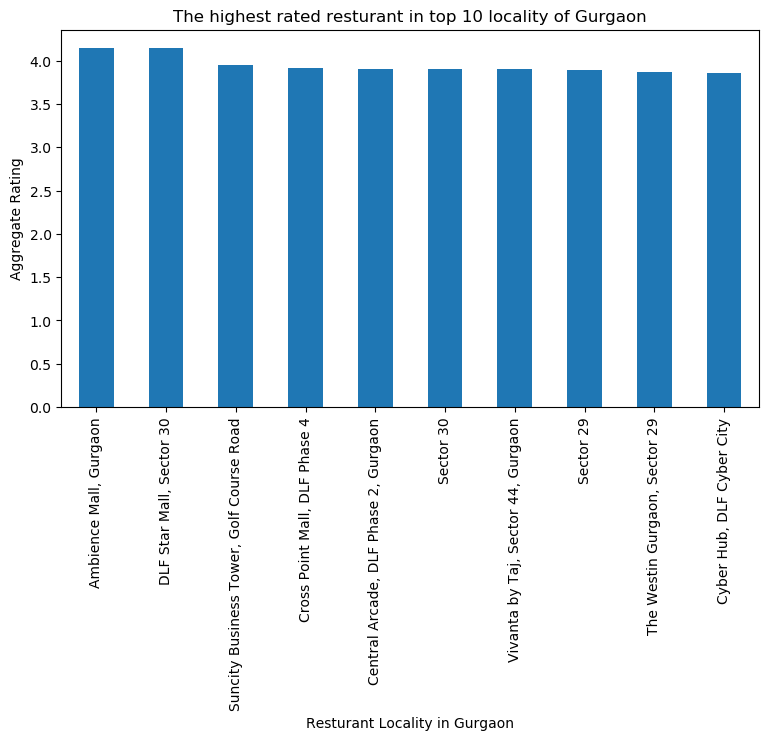

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

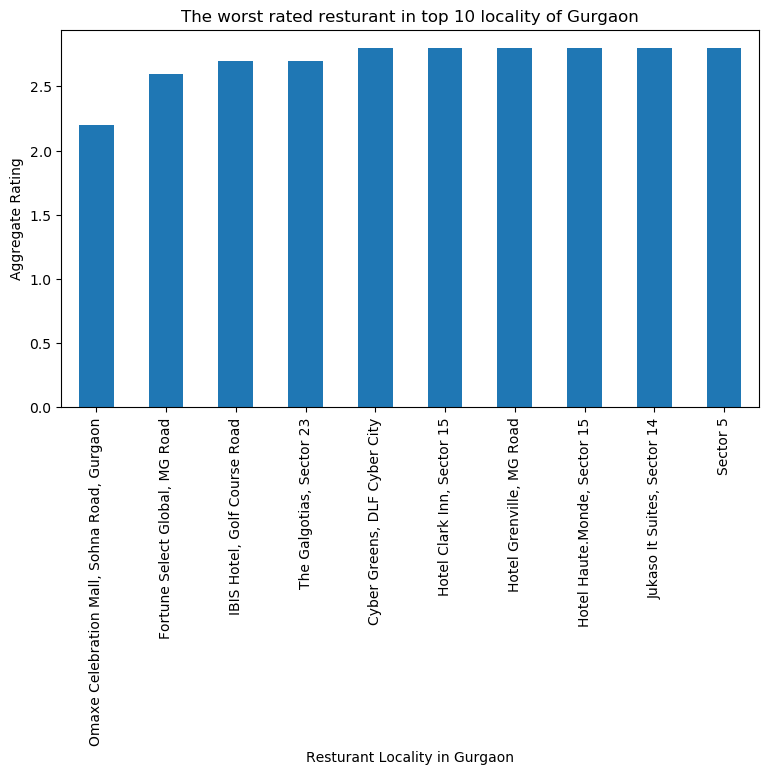

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The worst rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

In [11]:
#finding which locality has most number of food places
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10)

Locality
DLF Phase 3                  68
Cyber Hub, DLF Cyber City    41
Sector 14                    41
Sohna Road                   41
Sector 29                    38
Old Railway Road             36
Sector 31                    30
Golf Course Road             27
Sector 56                    26
MG Road                      24
Name: Restaurant Name, dtype: int64

In [12]:
#finding which locality has least number of food places
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10)

Locality
Central Arcade, DLF Phase 2, Gurgaon            1
Country Inn & Suites By Carlson, Udyog Vihar    1
Country Inn & Suites by Carlson, Gurgaon        1
Country Inn & Suites, Sohna Road                1
Courtyard by Marriott, Sushant Lok              1
Cyber Greens, DLF Cyber City                    1
DLF Phase 2                                     1
Fortune Select Global, MG Road                  1
Hotel Clark Inn, Sector 15                      1
Hotel Grenville, MG Road                        1
Name: Restaurant Name, dtype: int64

In [13]:
#the unique Cuisines available
df_Res['Cuisines'].unique()

array(['Cafe, Beverages', 'North Indian, Mughlai',
       'South Indian, Seafood, Kerala', 'Bakery', 'Ice Cream', 'Chinese',
       'Japanese, Thai, Chinese', 'Pizza, Desserts',
       'Raw Meats, Fast Food', 'Japanese',
       'North Indian, Chinese, Continental', 'Bakery, Fast Food',
       'Biryani', 'Pizza, Fast Food', 'Ice Cream, Desserts',
       'Italian, Pizza, Lebanese', 'Lebanese',
       'American, Fast Food, Salad, Healthy Food',
       'Chinese, Thai, North Indian, Japanese', 'North Indian',
       'North Indian, Fast Food', 'Cafe, Tea',
       'North Indian, Asian, Continental', 'Finger Food',
       'Continental, North Indian, Chinese',
       'Chinese, Italian, North Indian',
       'North Indian, Chinese, Italian, Continental',
       'Chinese, North Indian, Italian', 'Cafe, Belgian', 'Kashmiri',
       'Finger Food, Continental, Italian',
       'North Indian, Mughlai, Chinese, Seafood', 'Chinese, Thai, Sushi',
       'Continental, North Indian, Chinese, Italian',
   

In [14]:
#locality having maximum number of places which serve North Indian Cuisine
df_Res[df_Res['Cuisines'].str.contains('North Indian')].groupby('Locality')['Restaurant Name'].count().nlargest(5)

Locality
DLF Phase 3         38
Sector 29           25
Old Railway Road    21
Sector 14           21
Sohna Road          20
Name: Restaurant Name, dtype: int64

In [15]:
#locality having minimum number of places which serve North Indian Cuisine
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Restaurant Name'].count().nsmallest(5)

Locality
 ILD Trade Centre Mall, Sohna Road                1
Ambience Mall, Gurgaon                            1
Best Western Skycity Hotel, Sector 15, Gurgaon    1
Country Inn & Suites by Carlson, Gurgaon          1
Country Inn & Suites, Sohna Road                  1
Name: Restaurant Name, dtype: int64

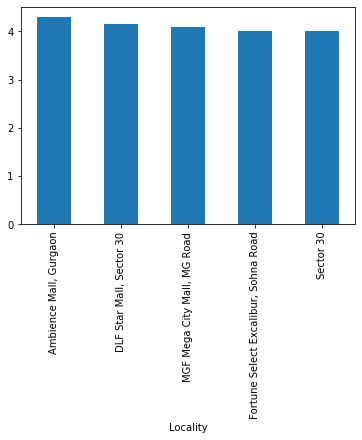

In [16]:
#locality having highest rated places which serve North Indian Cuisine
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

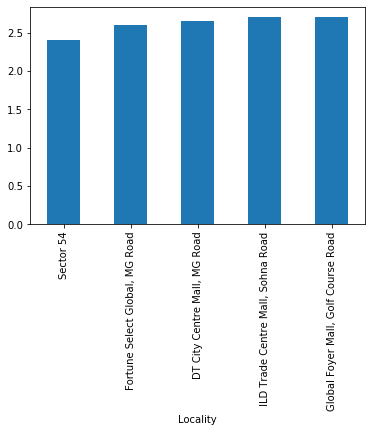

In [17]:
#locality having least rated places which serve North Indian Cuisine
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Aggregate rating'].mean().nsmallest(5).plot(kind='bar')

In [18]:
#grouping the data based on locality
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28


In [19]:
df_final.shape

(110, 8)

In [20]:
#Using Four Square

CLIENT_ID = 'BDJKWFXADI3254VZZ3HHPDTHO033DVRTF1A12ZIRIG1TH5UZ' # your Foursquare ID
CLIENT_SECRET = 'ASOSXJFXZCAQUHVLBCURDUWMAQJKFIYJG5XYBYCKVHC1JSJ5' # your Foursquare Secret
VERSION = '20200719' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BDJKWFXADI3254VZZ3HHPDTHO033DVRTF1A12ZIRIG1TH5UZ
CLIENT_SECRET:ASOSXJFXZCAQUHVLBCURDUWMAQJKFIYJG5XYBYCKVHC1JSJ5


In [21]:

## create a function to repeat the same process to all the Locality in Gurgaon

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# find the venues in all Gurgaon Locality
gurgaon_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )
gurgaon_venues.head()

 ILD Trade Centre Mall, Sohna Road
Ambience Mall, Gurgaon
Ansal Plaza Mall, Palam Vihar
Ardee City
Best Western Skycity Hotel, Sector 15, Gurgaon
Central Arcade, DLF Phase 2, Gurgaon
Central Plaza Mall, Golf Course Road
Country Inn & Suites By Carlson, Udyog Vihar
Country Inn & Suites by Carlson, Gurgaon
Country Inn & Suites by Carlson, Sector 12
Country Inn & Suites, Sohna Road
Courtyard by Marriott, Sushant Lok
Cross Point Mall, DLF Phase 4
Crowne Plaza, Sector 29
Cyber Greens, DLF Cyber City
Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater


In [23]:
gurgaon_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",10,10,10,10,10,10
"Ambience Mall, Gurgaon",39,39,39,39,39,39
"Ansal Plaza Mall, Palam Vihar",3,3,3,3,3,3
Ardee City,4,4,4,4,4,4
"Best Western Skycity Hotel, Sector 15, Gurgaon",5,5,5,5,5,5
"Central Arcade, DLF Phase 2, Gurgaon",22,22,22,22,22,22
"Central Plaza Mall, Golf Course Road",12,12,12,12,12,12
"Country Inn & Suites By Carlson, Udyog Vihar",4,4,4,4,4,4
"Country Inn & Suites by Carlson, Gurgaon",14,14,14,14,14,14


In [24]:
print('There are {} uniques categories.'.format(len(gurgaon_venues['Venue Category'].unique())))

There are 132 uniques categories.


In [25]:
## Analyze Each Locality

# one hot encoding
gurgaon_onehot = pd.get_dummies(gurgaon_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
gurgaon_onehot['Locality'] = gurgaon_venues['Locality'] 

# move Locality column to the first column
column_list = gurgaon_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
gurgaon_onehot = gurgaon_onehot[column_list]
gurgaon_onehot.head()

,Locality,ATM,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burmese Restaurant,Business Service,Cable Car,Café,Campground,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Coworking Space,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Gym,Gym / Fitness Center,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music School,New American Restaurant,Nightclub,Nightlife Spot,North Indian Restaurant,Office,Outdoors & Recreation,Park,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
gurgaon_grouped = gurgaon_onehot.groupby('Locality').mean().reset_index()
gurgaon_grouped.shape

(110, 133)

In [27]:

## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in gurgaon_grouped['Locality']:
    print("----"+hood+"----")
    temp = gurgaon_grouped[gurgaon_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
                 venue  freq
0              Brewery   0.2
1        Movie Theater   0.2
2    Indian Restaurant   0.1
3  Sporting Goods Shop   0.1
4     Department Store   0.1


----Ambience Mall, Gurgaon----
                  venue  freq
0     Indian Restaurant  0.15
1  Fast Food Restaurant  0.08
2         Shopping Mall  0.05
3                  Café  0.05
4             Multiplex  0.05


----Ansal Plaza Mall, Palam Vihar----
                venue  freq
0         Pizza Place  0.67
1                Café  0.33
2  Miscellaneous Shop  0.00
3            Pharmacy  0.00
4                Park  0.00


----Ardee City----
               venue  freq
0  Indian Restaurant  0.50
1    Thai Restaurant  0.25
2        Beer Garden  0.25
3                ATM  0.00
4          Nightclub  0.00


----Best Western Skycity Hotel, Sector 15, Gurgaon----
              venue  freq
0             Hotel   0.6
1  Asian Restaurant   0.2
2    Farmers Market   0.2
3               AT

In [28]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = gurgaon_grouped['Locality']

for ind in np.arange(gurgaon_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gurgaon_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted.head(10)

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Brewery,Movie Theater,Shopping Mall,Sporting Goods Shop,Department Store,Fast Food Restaurant,BBQ Joint,Indian Restaurant,Food,Flea Market
1,"Ambience Mall, Gurgaon",Indian Restaurant,Fast Food Restaurant,Multiplex,American Restaurant,Italian Restaurant,Asian Restaurant,Café,Clothing Store,Shopping Mall,Bar
2,"Ansal Plaza Mall, Palam Vihar",Pizza Place,Café,Food & Drink Shop,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
3,Ardee City,Indian Restaurant,Beer Garden,Thai Restaurant,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Asian Restaurant,Farmers Market,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Donut Shop
5,"Central Arcade, DLF Phase 2, Gurgaon",Department Store,Indian Restaurant,Shopping Mall,Clothing Store,Mexican Restaurant,Fast Food Restaurant,Donut Shop,Coffee Shop,Pizza Place,Café
6,"Central Plaza Mall, Golf Course Road",Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Hotel,Sandwich Place,Café,Diner,Ice Cream Shop,Dim Sum Restaurant,Dessert Shop
7,"Country Inn & Suites By Carlson, Udyog Vihar",Hotel,Clothing Store,Fast Food Restaurant,Campground,Electronics Store,Food,Flea Market,Farmers Market,Falafel Restaurant,Diner
8,"Country Inn & Suites by Carlson, Gurgaon",Hotel,Japanese Restaurant,Go Kart Track,Indian Restaurant,Café,Resort,Electronics Store,Deli / Bodega,Department Store,Dessert Shop
9,"Country Inn & Suites by Carlson, Sector 12",Hotel,Indian Restaurant,Donut Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner


In [30]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

gurgaon_clustering = gurgaon_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gurgaon_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(110,)

In [31]:
# add clustering labels
gurgaon_merged = df_final.head(240)
gurgaon_merged['Cluster Labels'] = kmeans.labels_

# merge gurgaon_grouped with df_Chinese to add latitude/longitude for each Locality
gurgaon_merged = gurgaon_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

gurgaon_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96,3,Brewery,Movie Theater,Shopping Mall,Sporting Goods Shop,Department Store,Fast Food Restaurant,BBQ Joint,Indian Restaurant,Food,Flea Market
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689,3,Indian Restaurant,Fast Food Restaurant,Multiplex,American Restaurant,Italian Restaurant,Asian Restaurant,Café,Clothing Store,Shopping Mall,Bar
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19,0,Pizza Place,Café,Food & Drink Shop,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65,2,Indian Restaurant,Beer Garden,Thai Restaurant,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28,4,Hotel,Asian Restaurant,Farmers Market,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Donut Shop


In [32]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gurgaon_merged['Lat'],gurgaon_merged['Lng'], gurgaon_merged['Locality'], gurgaon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [33]:

## Examine Clusters

## Cluster 1
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 0, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,28.511460,3.0,Average,19,0,Pizza Place,Café,Food & Drink Shop,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
82,28.425752,3.0,Average,118,0,Pizza Place,Tennis Court,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Dim Sum Restaurant


In [34]:
## Cluster 2
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 1, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,28.443040,3.500000,"Average, Good, Very Good",1214,1,Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Hotel,Sandwich Place,Café,Diner,Ice Cream Shop,Dim Sum Restaurant,Dessert Shop
7,28.509225,3.500000,Good,32,1,Hotel,Clothing Store,Fast Food Restaurant,Campground,Electronics Store,Food,Flea Market,Farmers Market,Falafel Restaurant,Diner
11,28.460925,3.200000,Average,6,1,Hotel,Indian Restaurant,Hotel Bar,Bakery,Fast Food Restaurant,Sandwich Place,Restaurant,Café,Diner,Chinese Restaurant
23,28.448633,3.675000,"Average, Good",214,1,Hotel,South Indian Restaurant,Whisky Bar,Italian Restaurant,Lounge,Nightclub,Coffee Shop,Gourmet Shop,Chinese Restaurant,Pizza Place
24,28.447905,3.706667,"Average, Good, Very Good",2920,1,Hotel,South Indian Restaurant,Whisky Bar,Italian Restaurant,Lounge,Falafel Restaurant,Nightclub,Gourmet Shop,Chinese Restaurant,Pizza Place
25,28.461636,4.150000,Very Good,306,1,Hotel,Chinese Restaurant,Restaurant,Japanese Restaurant,Tea Room,Multiplex,Coffee Shop,Vegetarian / Vegan Restaurant,Brewery,Department Store
28,28.422147,3.500000,"Average, Good",110,1,Hotel,Asian Restaurant,Moroccan Restaurant,Cable Car,Gift Shop,Gym / Fitness Center,Hotel Bar,Department Store,Dessert Shop,Dim Sum Restaurant
30,28.481847,2.600000,Average,20,1,Coffee Shop,Hotel,Buffet,Hotel Pool,Italian Restaurant,Light Rail Station,French Restaurant,Nightclub,Gym / Fitness Center,Chinese Restaurant
32,28.443011,3.559259,"Average, Excellent, Good, Very Good",3443,1,Chinese Restaurant,Italian Restaurant,Falafel Restaurant,Nightclub,Sandwich Place,Diner,Café,Hotel,Ice Cream Shop,Pizza Place
36,28.455392,2.800000,Average,19,1,Hotel,Spa,Department Store,Restaurant,Food Court,Golf Course,Flea Market,Dairy Store,Deli / Bodega,Gym / Fitness Center


In [35]:
## Cluster 3
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 2, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,28.441660,3.000000,Average,65,2,Indian Restaurant,Beer Garden,Thai Restaurant,Wine Bar,Electronics Store,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
68,28.495088,3.400000,Average,256,2,Hotel,Indian Restaurant,Donut Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner
100,28.239367,3.550000,"Average, Good",67,2,Indian Restaurant,Wine Bar,Donut Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner
103,28.503476,3.023077,Average,153,2,Gym,Indian Restaurant,Wine Bar,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Dim Sum Restaurant


In [36]:
## Cluster 4
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 4, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.458165,2.8500,Average,28,4,Hotel,Asian Restaurant,Farmers Market,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Donut Shop
8,28.461988,3.8000,Good,91,4,Hotel,Japanese Restaurant,Go Kart Track,Indian Restaurant,Café,Resort,Electronics Store,Deli / Bodega,Department Store,Dessert Shop
9,28.468385,3.2500,"Average, Good",44,4,Hotel,Indian Restaurant,Donut Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner
10,28.334942,3.4000,Average,19,4,Hotel,Food Court,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store
34,28.457610,2.8000,Average,7,4,Hotel,Asian Restaurant,Farmers Market,Electronics Store,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Donut Shop
35,28.465600,2.8000,Average,15,4,Hotel,Bed & Breakfast,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Food Stand
45,28.470510,3.0000,Average,35,4,Hotel,Indian Restaurant,Donut Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner
57,28.459079,3.2000,Average,13,4,Hotel,Market,Dessert Shop,Farmers Market,Electronics Store,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant,Donut Shop
62,28.449740,3.5000,Good,194,4,Hotel,Snack Place,Gym,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner
67,28.457396,2.9600,Average,99,4,Hotel,Department Store,Asian Restaurant,Falafel Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Donut Shop


In [37]:
## Cluster 5
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 5, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
